# Threshold algorithm

In [120]:
import random
import networkx as nx
import numpy as np
import copy
import matplotlib.pyplot as plt

In [172]:
def set_opinions(graph, opinions):
    n = nx.number_of_nodes(graph)
    d = {list(graph.nodes())[i] : opinions[i] for i in range(n)}
    nx.set_node_attributes(graph, d, 'state')
    return graph

#maybe z dupy
def set_epsilon(graph, e_list):
    node_list = list(graph.nodes())
    d = {node_list[i]: e_list[i] for i in range(len(node_list))}
    nx.set_node_attributes(graph, d, 'epsilon')
    return graph

def set_threshold_basic(graph, p):
    d = {node: p for node in list(graph.nodes())}
    nx.set_node_attributes(graph, d, 'threshold')
    return graph

def set_threshold(graph, p_list):
    node_list = list(graph.nodes())
    d = {node_list[i]: p_list[i] for i in range(len(node_list))}
    nx.set_node_attributes(graph, d, 'threshold')
    return graph

def threshold_algorithm(graph, q, max_steps):
    n = nx.number_of_nodes(graph)
    node_states = [0, 1]
    step = 0
    while node_states != [0] and node_states != [1] and step < max_steps:
        node = random.choice(list(graph.nodes()))
        curr_q = q
        if q > graph.degree[node]:
            curr_q = graph.degree[node]
        neighbor_list = random.choices(list(graph.neighbors(node)), k=curr_q) #add weighted edges and choice with weight
        node_opinion = graph.nodes[node]['state']
        contrary_opinion = 0 if node_opinion == 1 else 1
        op0_num = (n - list(nx.get_node_attributes(graph, 'state').values()).count(node_opinion))/n
        if op0_num >= graph.nodes[node]['threshold'] or \
           (random.uniform(0, 1) < graph.nodes[node]['epsilon'] and op0_num > 0):
            graph.nodes[node]['state'] = contrary_opinion
        node_states = list(set(list(nx.get_node_attributes(graph, 'state').values())))
        step += 1
    return graph, step


In [180]:
def get_time_for_N(graph, opinion0_prop, MC_steps, q, max_steps):
    n = nx.number_of_nodes(graph)
    opinion0_count = int(opinion0_prop*nx.number_of_nodes(graph))
    opinions = [0]*opinion0_count + [1]*(n-opinion0_count)
    random.shuffle(opinions)
    
    epsilon = np.random.uniform(0.0001, 0.001, n)
    threshold = np.random.uniform(0.1, 0.9, nx.number_of_nodes(graph))
    
    time_sum = 0
    for i in range(MC_steps):
        graph = set_opinions(graph, opinions)
        graph = set_epsilon(graph, epsilon)
        graph = set_threshold(graph, threshold)
        
        k = threshold_algorithm(graph, q, max_steps)[1]
        time_sum += k
        print(k)
    return time_sum/MC_steps

In [181]:
RG = nx.erdos_renyi_graph(50, 0.5)

In [182]:
get_time_for_N(RG, 0.4, 10, 5, 1000)

320
389
297
218
219
259
346
412
238
439


313.7

In [123]:
ss = []
M = 10
RG = nx.erdos_renyi_graph(100, 0.5)
dupa = Threshold(RG)
dupa.set_opinions(20)
dupa.set_threshold(np.random.uniform(0.1, 0.9, 100))
dupa.set_epsilon(np.random.uniform(0.0001, 0.001, 100))

for i in range(20):
    k = 0
    for j in range(M):
        dupa2 = copy.deepcopy(dupa)
        k += dupa2.threshold_algorithm(i, 1000)[1]
    ss.append(k/M)

In [66]:
dupa = Threshold(RG)

In [76]:
dupa.set_opinions(20)

In [77]:
dupa.set_threshold(np.random.uniform(0.1, 0.9, 50))

In [78]:
dupa.set_epsilon(np.random.uniform(0.0001, 0.001, 50))

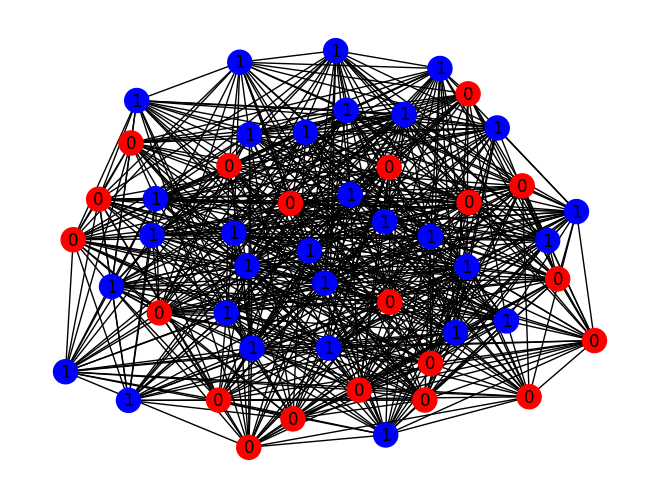

In [79]:
colors = {0:'red', 1:'blue'}
labels = nx.get_node_attributes(RG, 'state')
node_color = [colors[state] for state in labels.values()]
nx.draw(RG, labels=labels, node_color=node_color)

In [80]:
newRG, s = dupa.threshold_algorithm(5, 1000)

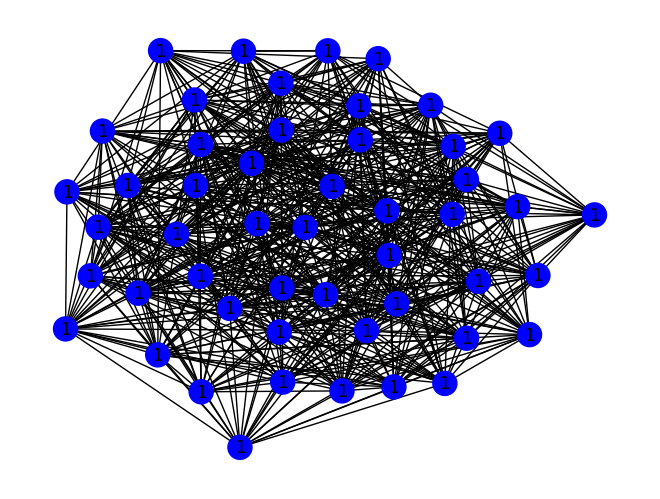

In [81]:
labels = nx.get_node_attributes(newRG, 'state')
node_color = [colors[state] for state in labels.values()]
nx.draw(newRG, labels=labels, node_color=node_color)

In [82]:
s

294